<a href="https://colab.research.google.com/github/babupallam/Msc_AI_Module2_Natural_Language_Processing/blob/main/L06-Feed%20Forward%20Networks%20for%20Natural%20Language%20Processing/01_MLP_Basic_Architecture_and_Setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. **Introduction**

- **Multilayer Perceptron (MLP)**:
  - MLP is one of the simplest neural networks. It's a type of **feedforward neural network** where data flows in one direction: from input to output.
  - MLP consists of layers:
    - **Input Layer**: Takes input features (e.g., pixels of an image, data points).
    - **Hidden Layer**: Processes the input and applies transformations using weights and activation functions.
    - **Output Layer**: Provides the final output, typically for classification or regression.
  
  - **Common Usage**:
    - **Classification** (e.g., identifying digits in images).
    - **Regression** (predicting continuous values like house prices).
  
  **Observation**:
  - MLPs are easy to understand and implement, making them an excellent starting point for deep learning.

  **Demonstration**:
  - Print a short introduction to MLPs and how they work using simple language:


In [1]:
print("An MLP is a feedforward neural network that consists of an input layer, hidden layer(s), and an output layer.")


An MLP is a feedforward neural network that consists of an input layer, hidden layer(s), and an output layer.


---


### 2. **Setting Up the Environment**

- **Using `InteractiveShell` for Multiple Outputs**:
  - In Jupyter notebooks, when multiple operations occur in a single cell, sometimes only the last output is shown.
  - By enabling `InteractiveShell.ast_node_interactivity = "all"`, we ensure that all operations produce outputs, which helps with debugging and visualization.

  **Demonstration**:
  - Run the following code to enable multiple outputs:


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



- **Ensuring Reproducibility**:
  - **Reproducibility**: Ensuring the same results when running the code multiple times.
  - Random operations (e.g., generating random numbers, initializing neural network weights) can give different results on different runs.
  - **Setting a seed**: By fixing a seed value, we ensure that random operations generate the same results every time.

  **Observation**:
  - Without setting seeds, neural networks can behave differently each time you train them. This makes comparison difficult.

  **Demonstration**:
  - Set a random seed for CPU and GPU operations:


In [4]:
import torch  # Import the torch library, which is the main PyTorch package for building and training machine learning models

# The random seed is set to ensure that the operations involving randomness
# (like weight initialization in neural networks, random sampling, etc.)
# are reproducible. This is very important for debugging and testing.
seed = 1337  # Define the seed value; this can be any integer. 1337 is just a chosen example.

# Set the seed for generating random numbers on the CPU.
# This ensures that all the random number generation that happens on the CPU
# (for example, initializing weights of a model) will be deterministic.
torch.manual_seed(seed)

# If you are using GPU(s) with CUDA, this function will ensure that all random
# number generation on the GPU(s) is also deterministic, making your results
# reproducible across runs, even on GPUs.
torch.cuda.manual_seed_all(seed)

# This message is printed to indicate that the random seed has been set,
# confirming to the user that reproducibility is ensured.
print("Random seed set to ensure reproducibility.")


Random seed set to ensure reproducibility.


  - Compare outputs with and without setting the seed:


In [7]:
# Without seed
print("Without seed:")
print(torch.rand(2, 2))  # Generates a 2x2 tensor of random numbers without any seed.


Without seed:
tensor([[0.2004, 0.0287],
        [0.5851, 0.6967]])


In [8]:
# Without seed
print("Without seed:")
print(torch.rand(2, 2))  # Generates a 2x2 tensor of random numbers without any seed.


Without seed:
tensor([[0.1761, 0.2595],
        [0.7086, 0.5809]])


Above two results are different in each exicution

In [10]:
# With seed
torch.manual_seed(seed)  # Setting the seed to a fixed value
print("With seed:")
print(torch.rand(2, 2))  # Generates a 2x2 tensor of random numbers, but now with the seed set


With seed:
tensor([[0.0783, 0.4956],
        [0.6231, 0.4224]])


In [11]:
# With seed
torch.manual_seed(seed)  # Setting the seed to a fixed value
print("With seed:")
print(torch.rand(2, 2))  # Generates a 2x2 tensor of random numbers, but now with the seed set


With seed:
tensor([[0.0783, 0.4956],
        [0.6231, 0.4224]])


Above two results are same even after the second exicution

---



### 3. **Network Initialization**

- **Defining the MLP**:
  - An MLP consists of **fully connected (dense) layers** where each input is connected to every neuron in the next layer.
  - PyTorch provides the `nn.Module` class, which we use to define custom models.

  **Layers**:
  - **Input layer**: The input dimension is defined by the number of features in the data (e.g., if the input is a 3D vector, `input_dim = 3`).
  - **Hidden layer**: A hidden layer is a layer between input and output layers that applies transformations to the input data.
  - **Output layer**: Outputs the final prediction, typically the number of classes (for classification) or a single value (for regression).

  **Activation Function (ReLU)**:
  - **ReLU (Rectified Linear Unit)**: A common activation function that outputs the input if it’s positive, otherwise it outputs zero.
  - It introduces non-linearity, which helps the network learn complex patterns.
  


  **MLP Class Definition**:
  - Here’s how to define a basic MLP in PyTorch:


In [16]:
import torch.nn.functional as F  # Importing the functional module from PyTorch to access activation functions like ReLU
import torch.nn as nn  # Importing the torch.nn module to define neural network layers

# Define a class for a simple Multilayer Perceptron (MLP) neural network
class MultilayerPerceptron(nn.Module):  # Inherit from nn.Module to define a custom neural network
    def __init__(self, input_dim, hidden_dim, output_dim):
        # The __init__ method is the constructor that initializes the MLP's layers
        super(MultilayerPerceptron, self).__init__()  # Call the parent class's constructor to properly initialize nn.Module

        # Describe the architecture before building it
        print(f"Initializing Multilayer Perceptron with the following dimensions:\n"
              f"Input Layer Dimension: {input_dim}\n"
              f"Hidden Layer Dimension: {hidden_dim}\n"
              f"Output Layer Dimension: {output_dim}")

        # Defining layers in the network
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # First fully connected (dense) layer: transforms input_dim -> hidden_dim
        print(f"Layer 1: Fully Connected (Linear) Layer mapping {input_dim} -> {hidden_dim}")

        self.fc2 = nn.Linear(hidden_dim, output_dim)  # Second fully connected layer: transforms hidden_dim -> output_dim
        print(f"Layer 2: Fully Connected (Linear) Layer mapping {hidden_dim} -> {output_dim}")

        # Summarize the network architecture after initialization
        print("\nMultilayer Perceptron Initialized Successfully.")

    def forward(self, x):
        # The forward method defines how data flows through the network

        # Describe the input shape before passing through the network
        print(f"\nForward Pass - Input Tensor Shape: {x.shape}")

        # Passing the input through the first fully connected layer and applying ReLU activation
        x = F.relu(self.fc1(x))  # Apply ReLU activation to introduce non-linearity
        print(f"After Layer 1 (with ReLU activation) - Tensor Shape: {x.shape}")

        # Passing the data through the second fully connected layer (final output)
        x = self.fc2(x)  # No activation applied here, as it's the final output layer
        print(f"After Layer 2 (Output Layer) - Tensor Shape: {x.shape}\n")

        return x


In [17]:

# Example usage to demonstrate the architecture
# Creating a sample MLP with input dimension 10, hidden dimension 5, and output dimension 2
model = MultilayerPerceptron(input_dim=10, hidden_dim=5, output_dim=2)

# Create a random input tensor with size (batch_size=1, input_dim=10) for testing the forward pass
sample_input = torch.randn(1, 10)

# Forward pass with sample input to visualize the flow of data through the network
output = model.forward(sample_input)

# Print the output tensor
print(f"Final Output: {output}")


Initializing Multilayer Perceptron with the following dimensions:
Input Layer Dimension: 10
Hidden Layer Dimension: 5
Output Layer Dimension: 2
Layer 1: Fully Connected (Linear) Layer mapping 10 -> 5
Layer 2: Fully Connected (Linear) Layer mapping 5 -> 2

Multilayer Perceptron Initialized Successfully.

Forward Pass - Input Tensor Shape: torch.Size([1, 10])
After Layer 1 (with ReLU activation) - Tensor Shape: torch.Size([1, 5])
After Layer 2 (Output Layer) - Tensor Shape: torch.Size([1, 2])

Final Output: tensor([[-0.3825, -0.5920]], grad_fn=<AddmmBackward0>)



  **Observation**:
  - Using ReLU ensures that only positive values are passed through, which helps prevent problems like vanishing gradients.

  **Demonstration**:
  - Instantiate and print the model:


In [18]:
input_dim = 3  # Number of features or dimensions in the input data
hidden_dim = 100  # Number of neurons in the hidden layer
output_dim = 4  # Number of output classes or predictions
mlp = MultilayerPerceptron(input_dim, hidden_dim, output_dim)  # Instantiate the MLP model with defined dimensions
print(mlp)  # Print the structure of the MLP model


Initializing Multilayer Perceptron with the following dimensions:
Input Layer Dimension: 3
Hidden Layer Dimension: 100
Output Layer Dimension: 4
Layer 1: Fully Connected (Linear) Layer mapping 3 -> 100
Layer 2: Fully Connected (Linear) Layer mapping 100 -> 4

Multilayer Perceptron Initialized Successfully.
MultilayerPerceptron(
  (fc1): Linear(in_features=3, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=4, bias=True)
)



  - Pass a random input through the network and print the output:


In [19]:
x_input = torch.rand(2, input_dim)  # Create a random input tensor with shape (2, input_dim)
output = mlp(x_input)  # Pass the input through the MLP model to get the output
print("Model output:", output)  # Print the output of the model



Forward Pass - Input Tensor Shape: torch.Size([2, 3])
After Layer 1 (with ReLU activation) - Tensor Shape: torch.Size([2, 100])
After Layer 2 (Output Layer) - Tensor Shape: torch.Size([2, 4])

Model output: tensor([[-0.1347,  0.1418,  0.1305, -0.2920],
        [-0.1277,  0.1504,  0.0810, -0.2548]], grad_fn=<AddmmBackward0>)


---



### 4. **Exercise: Modify the Hidden Units**



- **Changing the Hidden Layer Size**:
  - The number of hidden units (neurons in the hidden layer) determines how much the model can learn.
  - More hidden units allow the model to capture more complex patterns, but too many may lead to overfitting.

  **Task**:
  - Change the number of hidden units (e.g., from 100 to 50, 200, etc.) and observe how the model structure changes.
  
  **Demonstration**:
  - Modify the hidden dimension and observe the number of parameters:


In [20]:
hidden_dim = 50  # Modify the number of neurons in the hidden layer
mlp = MultilayerPerceptron(input_dim, hidden_dim, output_dim)  # Re-instantiate the MLP model with the updated hidden_dim
print(f"Model with {hidden_dim} hidden units:", mlp)  # Print the new model architecture


Initializing Multilayer Perceptron with the following dimensions:
Input Layer Dimension: 3
Hidden Layer Dimension: 50
Output Layer Dimension: 4
Layer 1: Fully Connected (Linear) Layer mapping 3 -> 50
Layer 2: Fully Connected (Linear) Layer mapping 50 -> 4

Multilayer Perceptron Initialized Successfully.
Model with 50 hidden units: MultilayerPerceptron(
  (fc1): Linear(in_features=3, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=4, bias=True)
)



- **Observation**:
  - Fewer hidden units mean fewer learnable parameters, which may reduce the model’s capacity to learn complex data patterns.

  - Check the total number of parameters in the model:


In [21]:
def count_parameters(model):
    # This function sums the number of parameters in the model that require gradients
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Total parameters:", count_parameters(mlp))  # Print the total number of trainable parameters in the model


Total parameters: 404


---



### 5. **Conclusion**

- **Recap**:
  - MLPs are simple yet powerful neural networks, consisting of input, hidden, and output layers.
  - ReLU helps introduce non-linearity, making the model capable of learning more complex patterns.
  - Setting a random seed ensures reproducibility, an important aspect when comparing models.



- **Extending the MLP**:
  - To extend this basic MLP for more complex tasks, you can add more hidden layers, use regularization techniques like **dropout**, or even include **batch normalization** to stabilize learning.

  **Demonstration**:
  - Add more layers to make the MLP deeper:
    ```python
    class DeepMLP(nn.Module):
        def __init__(self, input_dim, hidden_dim, output_dim):
            super(DeepMLP, self).__init__()
            self.fc1 = nn.Linear(input_dim, hidden_dim)
            self.fc2 = nn.Linear(hidden_dim, hidden_dim)
            self.fc3 = nn.Linear(hidden_dim, output_dim)

        def forward(self, x):
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            return self.fc3(x)

    deep_mlp = DeepMLP(input_dim, hidden_dim, output_dim)
    print("Deep MLP with two hidden layers:", deep_mlp)
    ```


### Observation 1

In [23]:
import torch
import torch.nn.functional as F  # Importing the functional module from PyTorch to access activation functions like ReLU
import torch.nn as nn  # Importing the torch.nn module to define neural network layers

# Define a class for a simple Multilayer Perceptron (MLP) neural network
class MultilayerPerceptron(nn.Module):  # Inherit from nn.Module to define a custom neural network
    def __init__(self, input_dim, hidden_dim, output_dim):
        # The __init__ method is the constructor that initializes the MLP's layers
        super(MultilayerPerceptron, self).__init__()  # Call the parent class's constructor to properly initialize nn.Module

        # Describe the architecture before building it
        print(f"Initializing Multilayer Perceptron with the following dimensions:\n"
              f"Input Layer Dimension: {input_dim}\n"
              f"Hidden Layer Dimension: {hidden_dim}\n"
              f"Output Layer Dimension: {output_dim}")

        # Defining layers in the network
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # First fully connected (dense) layer: transforms input_dim -> hidden_dim
        print(f"Layer 1: Fully Connected (Linear) Layer mapping {input_dim} -> {hidden_dim}")

        self.fc2 = nn.Linear(hidden_dim, output_dim)  # Second fully connected layer: transforms hidden_dim -> output_dim
        print(f"Layer 2: Fully Connected (Linear) Layer mapping {hidden_dim} -> {output_dim}")

        # Summarize the network architecture after initialization
        print("\nMultilayer Perceptron Initialized Successfully.")

    def forward(self, x):
        # The forward method defines how data flows through the network

        # Describe the input shape before passing through the network
        print(f"\nForward Pass - Input Tensor Shape: {x.shape}")

        # Passing the input through the first fully connected layer and applying ReLU activation
        x = F.relu(self.fc1(x))  # Apply ReLU activation to introduce non-linearity
        print(f"After Layer 1 (with ReLU activation) - Tensor Shape: {x.shape}")

        # Passing the data through the second fully connected layer (final output)
        x = self.fc2(x)  # No activation applied here, as it's the final output layer
        print(f"After Layer 2 (Output Layer) - Tensor Shape: {x.shape}\n")

        return x

    def describe_model_architecture(self):
        # Additional method to describe more details about the architecture
        print("\n==== Model Architecture Description ====")
        print(f"First Layer:\n\tFully Connected Layer with {self.fc1.in_features} input features "
              f"and {self.fc1.out_features} output features.")
        print("This layer transforms the input data and introduces non-linearity using the ReLU activation function.")

        print(f"Second Layer:\n\tFully Connected Layer with {self.fc2.in_features} input features "
              f"and {self.fc2.out_features} output features.")
        print("This layer produces the final output without any activation function.")
        print("========================================\n")



In [24]:
# Example usage to demonstrate the architecture and features
# Creating a sample MLP with input dimension 10, hidden dimension 5, and output dimension 2
model = MultilayerPerceptron(input_dim=10, hidden_dim=5, output_dim=2)

# Call the method to describe the model architecture
model.describe_model_architecture()

# Create a random input tensor with size (batch_size=1, input_dim=10) for testing the forward pass
sample_input = torch.randn(1, 10)

# Forward pass with sample input to visualize the flow of data through the network
output = model.forward(sample_input)



Initializing Multilayer Perceptron with the following dimensions:
Input Layer Dimension: 10
Hidden Layer Dimension: 5
Output Layer Dimension: 2
Layer 1: Fully Connected (Linear) Layer mapping 10 -> 5
Layer 2: Fully Connected (Linear) Layer mapping 5 -> 2

Multilayer Perceptron Initialized Successfully.

==== Model Architecture Description ====
First Layer:
	Fully Connected Layer with 10 input features and 5 output features.
This layer transforms the input data and introduces non-linearity using the ReLU activation function.
Second Layer:
	Fully Connected Layer with 5 input features and 2 output features.
This layer produces the final output without any activation function.


Forward Pass - Input Tensor Shape: torch.Size([1, 10])
After Layer 1 (with ReLU activation) - Tensor Shape: torch.Size([1, 5])
After Layer 2 (Output Layer) - Tensor Shape: torch.Size([1, 2])



In [25]:
# Print the output tensor
print(f"Final Output: {output}\n")

# Observing Layer Weights and Biases
print("\n==== Layer Weights and Biases Observation ====")
print(f"Layer 1 Weights:\n{model.fc1.weight}")
print(f"Layer 1 Biases:\n{model.fc1.bias}")
print(f"Layer 2 Weights:\n{model.fc2.weight}")
print(f"Layer 2 Biases:\n{model.fc2.bias}")
print("================================================")



Final Output: tensor([[0.2676, 0.2072]], grad_fn=<AddmmBackward0>)


==== Layer Weights and Biases Observation ====
Layer 1 Weights:
Parameter containing:
tensor([[-0.1742, -0.0934, -0.0014, -0.1310, -0.0402, -0.2854,  0.1765, -0.0650,
         -0.1880,  0.1912],
        [-0.2435,  0.0076, -0.2248,  0.0050, -0.1460,  0.2338, -0.1665,  0.1819,
         -0.1094, -0.2144],
        [-0.2874,  0.1547,  0.0313, -0.0147,  0.2173,  0.0531,  0.3005, -0.1478,
          0.0837,  0.2514],
        [ 0.2140, -0.2625, -0.0409,  0.1367,  0.1092, -0.3127, -0.0341, -0.1835,
          0.1204,  0.0943],
        [ 0.0597, -0.2924, -0.2388, -0.1106, -0.0437, -0.1526, -0.2982,  0.2189,
         -0.1851,  0.0933]], requires_grad=True)
Layer 1 Biases:
Parameter containing:
tensor([ 0.0401,  0.2618, -0.0426, -0.1637, -0.2500], requires_grad=True)
Layer 2 Weights:
Parameter containing:
tensor([[-1.2970e-01, -3.6828e-04, -2.3133e-01,  2.1545e-01, -3.8144e-01],
        [-4.4117e-01, -1.4184e-01, -1.8915e-01,  3.51

In [26]:
# Demonstration of input-output relation by feeding multiple inputs
batch_input = torch.randn(5, 10)  # Simulating a batch of 5 input samples
print("\nForward Pass with Batch of Inputs")
print(f"Input Shape (Batch of 5 samples): {batch_input.shape}")

# Pass batch through the network
batch_output = model.forward(batch_input)
print(f"Output Shape after Forward Pass: {batch_output.shape}\n")




Forward Pass with Batch of Inputs
Input Shape (Batch of 5 samples): torch.Size([5, 10])

Forward Pass - Input Tensor Shape: torch.Size([5, 10])
After Layer 1 (with ReLU activation) - Tensor Shape: torch.Size([5, 5])
After Layer 2 (Output Layer) - Tensor Shape: torch.Size([5, 2])

Output Shape after Forward Pass: torch.Size([5, 2])



In [27]:
# Plotting Weight Distributions for Deeper Understanding (Visualization)
import matplotlib.pyplot as plt

def plot_weights(layer, layer_name):
    # Plot the weights of the given layer
    plt.hist(layer.weight.detach().numpy().flatten(), bins=20, alpha=0.7)
    plt.title(f"Weight Distribution in {layer_name}")
    plt.xlabel("Weight values")
    plt.ylabel("Frequency")
    plt.show()



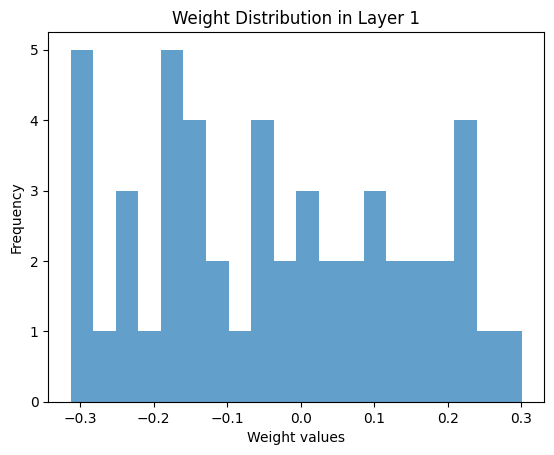

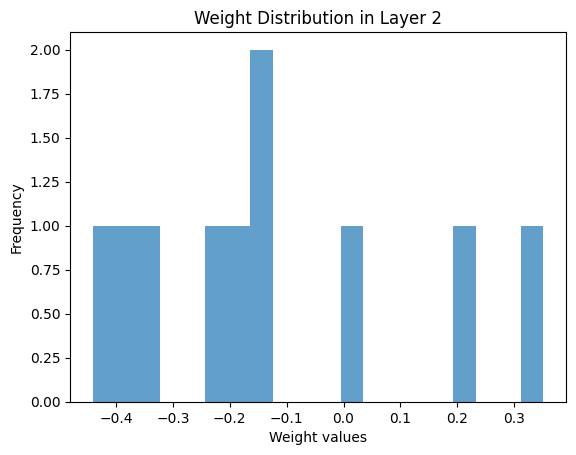


Forward Pass with Scaled Input
Scaled Input:
tensor([[ -58.3783,   12.1119,  203.3037,  -10.2780,  -64.4596,   94.9214,
         -122.1876,    3.4162,  110.2990,   83.1928]])

Forward Pass - Input Tensor Shape: torch.Size([1, 10])
After Layer 1 (with ReLU activation) - Tensor Shape: torch.Size([1, 5])
After Layer 2 (Output Layer) - Tensor Shape: torch.Size([1, 2])

Output for Scaled Input: tensor([[-1.8487, -1.4916]], grad_fn=<AddmmBackward0>)



In [28]:
# Visualize weight distribution for both layers
plot_weights(model.fc1, "Layer 1")
plot_weights(model.fc2, "Layer 2")

# Analyzing the effect of input scaling
scaled_input = torch.randn(1, 10) * 100  # Creating a scaled-up version of the input
print("\nForward Pass with Scaled Input")
print(f"Scaled Input:\n{scaled_input}")

# Pass scaled input through the network
scaled_output = model.forward(scaled_input)
print(f"Output for Scaled Input: {scaled_output}\n")

